In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.special import lambertw

In [1]:
1 / (3.14 * 2 *1764 * 8.0e-5)

1.1283706688620245

In [3]:
1 / (3.14 * 2 *1357 * 6.7e-5)

1.7514014539294196

In [2]:
1 / (3.14 * 2 *1094 * 4.9e-5)

2.970482199563648

In [2]:
# Using power series equations for current with fr-XAS fitting parameters
# plugged into the coefficients. Essentially, different order polynomials.
# Find all of that work in "1D_PatternedThinFilm_SteadyState_Current.nb"

def predict_i(v, coefs, order=1):
    y = np.zeros(v.shape)

    if order>len(coefs):
        print(f'Requested order larger than coefficients given. Using {len(coefs)} order instead.')
    for i, coef in enumerate(coefs[:order]):
        y += coef * v**(i+1)
    return y

def delta(h, s, a, T, Po2):
    R = 8.314
    
    delta = R * T / a * lambertw(3 * a / (R * T * np.sqrt(Po2)) * np.exp(-s / R + h / (R* T)))
    return np.real(delta)

def chi(h, s, a, T, Po2, Po2eff):
    return delta(h, s, a, T, Po2eff) / delta(h, s, a, T, Po2) - 1

def Ao(h, s, a, T, Po2):
    R = 8.314
    return 1 + a * delta(h, s, a, T, Po2) / (R * T)

def Roo(h, s, a, T, Po2, L, tg):
    co = 3/35.914
    xvo = delta(h, s, a, T, Po2) / 3
    Aoa = Ao(h, s, a, T, Po2)
    
    return 1 / (4 * tg) * (co * L * xvo / Aoa)

def Po2eq(T, Po2, eta):
    F = 96485
    R = 8.314

    return Po2 * np.exp(eta * 4 * F / ( R * T))

def i_gate(h, s, a, T, Po2, L, tg, eta):
    F = 96485
    
    Roo_a = Roo(h, s, a, T, Po2, L, tg)
    Ao_a = Ao(h, s, a, T, Po2)
    chi_a = chi(h, s, a, T, Po2, Po2eq(T, Po2, eta))
    return -4 * F * Roo_a * ((1 + chi_a)**2 - np.exp(-2* (Ao_a - 1) * chi_a))

In [91]:
F = 96485
R = 8.314
aa = 299000
ha = -106000
sa = -69.4
T = 973.15
L = 630e-7
W = 3 * 0.324
G = 4.478e-4

tg_1 = 3.2611
tg_10 = 1.16971594
tg_100 = 0.1439

In [92]:
# Checking function results
print(Ao(ha, sa, aa, T, .01), Ao(ha, sa, aa, T, .1), Ao(ha, sa, aa, T, 1))
print(delta(ha, sa, aa, T, .01)/3, delta(ha, sa, aa, T, .1)/3, delta(ha, sa, aa, T, 1)/3)
print(Roo(ha, sa, aa, T, .01, L, 3.26), Roo(ha, sa, aa, T, .1, L, 1.17), Roo(ha, sa, aa, T, 1, L, 0.244))
print(Po2eq(T, .01, -.001), Po2eq(T, .1, -.001), Po2eq(T, 1, -.001))
print(chi(ha, sa ,aa , T, .01, Po2eq(T,.01, -.001)), chi(ha, sa ,aa , T, .1, Po2eq(T,.1, -.001)), chi(ha, sa ,aa , T, 1, Po2eq(T,1, -.001)))
print(i_gate(ha, sa, aa, T, 0.01, L, 3.26, -.01) * W * G, i_gate(ha, sa, aa, T, 0.1, L, 1.17, -.01) * W * G, i_gate(ha, sa, aa, T, 1, L, 0.244, -.01) * W * G)
# Everything is the same as Mathematica results

2.716591899627462 2.05351142529144 1.55077556106985
0.015483331882738205 0.009502472336950884 0.004967890624904242
2.3001727602104432e-09 5.203453324528733e-09 1.727313970447188e-08
0.009534185547116894 0.09534185547116895 0.9534185547116895
0.008793767431298116 0.011647339878905871 0.015456050552986378
-1.7389467452091753e-07 -4.154893870424648e-07 -1.4847551524018755e-06


In [56]:
# Inputting voltages and currrents from IV measurements

v_1 = np.array([-0.1996659, -0.1993592, -0.1493661, -0.09937298, -0.07483646, 
-0.04968655, -0.02975063, -0.009814722, -0.009508016, 0.000306587, \
0.005520595, 0.005827302, 0.006134008, 0.01012119, 0.0300571, \
0.04999302, 0.05029972, 0.07514293, 0.07544964, 0.09967944, \
0.09998615, 0.1499793])

v_10 = np.array([-0.2993455, -0.2791029, -0.259167, -0.2392311, -0.2192952, \
-0.2189884, -0.1993592, -0.1794233, -0.1791166, -0.1594874, \
-0.1392448, -0.1196156, -0.1193089, -0.09937298, -0.07974377, \
-0.04968655, -0.03956524, -0.02975063, -0.02944393, -0.01962933, \
-0.009814722, -0.009508016, 0.000306587, 0.004600476, 0.004907182, \
0.005213889, 0.005520595, 0.01012119, 0.01993579, 0.0202425, \
0.0300571, 0.03036381, 0.04017841, 0.04999302, 0.05029972, \
0.07514293, 0.09967944, 0.09998615])

v_100 = np.array([-0.2993455, -0.2493524, -0.1993592, -0.1794233, -0.1791166, \
-0.1594874, -0.1196156, -0.1193089, -0.09937298, -0.07974377, \
-0.05980786, -0.03987194, -0.03956524, -0.01962933, 0.000306587, \
0.000613294, 0.00092, 0.001226706, 0.01993579, 0.0202425, 0.04017841, \
0.06011432, 0.06042103, 0.08005024, 0.08035694, 0.09998615])

imeas_1 = np.array([-0.00028253790, -0.00028259920, -0.00017249170, -0.00009315285, \
-0.00006431632, -0.00004050977, -0.00002433408, -0.00001017222, \
-0.00001017836, -0.00000361300, -0.00000239232, 0.00000012267, \
0.00000282169, 0.00000260700, 0.00001470105, 0.00002676319, \
0.00002681840, 0.00004308611, 0.00004314131, 0.00006215711, \
0.00006213870, 0.00011526020])

imeas_10 = np.array([-0.00079835660, -0.00069235890, -0.00059409020, -0.00050716960, \
-0.00042613780, -0.00042534040, -0.00035197620, -0.00028750650, \
-0.00028732250, -0.00023217670, -0.00018249030, -0.00014025070, \
-0.00014038560, -0.00010570330, -0.00007730227, -0.00004300023, \
-0.00003349847, -0.00002480641, -0.00002480641, -0.00001690565, \
-0.00000951219, -0.00000948336, -0.00000259719, -0.00000269903, \
-0.00000104281, 0.00000055206, 0.00000208559, 0.00000397798, \
0.00001032496, 0.00001031515, 0.00001658054, 0.00001651307, \
0.00002292323, 0.00002937633, 0.00002940700, 0.00004717757, \
0.00006845685, 0.00006846298])

imeas_100 = np.array([-0.00109040200, -0.00078412540, -0.00052005130, -0.00042282540, \
-0.00042264130, -0.00034185490, -0.00021138200, -0.00021132070, \
-0.00016409400, -0.00012333890, -0.00008757693, -0.00005651371, \
-0.00005652598, -0.00002805750, -0.00000099324, -0.00000105047, \
-0.00000214696, 0.00000085877, 0.00002581240, 0.00002580627, \
0.00005427475, 0.00008497605, 0.00008454054, 0.00011832120, \
0.00011831500, 0.00015390520])

In [85]:
# Inputting voltages and currrents from IV measurements using E Applied

v_1 = np.array([-0.2,-0.15,-0.1,-0.075,-0.05,-0.03,-0.01,0,0.01,0.03,0.05,
                0.075,0.1,0.15])

v_10 = np.array([-0.3,-0.28,-0.26,-0.24,-0.22,-0.2,-0.18,-0.16,-0.14,-0.12,
                 -0.1,-0.08,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,
                 0.04,0.05,0.075,0.1,])

v_100 = np.array([-0.3, -0.25, -0.2, -0.18, -0.16, -0.12, -0.1, -0.08, -0.06, -0.04,
                  -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1])

imeas_1 = np.array([-0.000282599,-0.000172492,-9.31529E-05,-6.43163E-05,-4.05098E-05,
                    -2.43341E-05,-1.01784E-05,2.82169E-06,2.607E-06,1.47011E-05,2.68184E-05,
                    4.31413E-05,6.21387E-05,0.00011526])

imeas_10 = np.array([-0.000798357,-0.000692359,-0.00059409,-0.00050717,-0.00042534,
                     -0.000351976,-0.000287323,-0.000232177,-0.00018249,-0.000140386,
                     -0.000105703,-7.73023E-05,-4.30002E-05,-3.34985E-05,-2.48064E-05,
                     -1.69057E-05,-9.48336E-06,2.08559E-06,3.97798E-06,1.03152E-05,
                     1.65131E-05,2.29232E-05,0.000029407,4.71776E-05,6.8463E-05])

imeas_100 = np.array([-0.001090402, -0.000784125, -0.000520051, -0.000422825, -0.000341855,
                      -0.000211321, -0.000164094, -0.000123339, -8.75769E-05, -5.65137E-05,
                      -2.80575E-05, -9.93238E-07, 2.58063E-05, 5.42748E-05, 8.49761E-05,
                      0.000118321, 0.000153905])

In [61]:
# Inputting power series coefficients
coefs_1 = [0.000299306, -0.000222947, 0.00147619, -0.0105029, -0.0670121]
coefs_10 = [0.000325041, -0.00101389, 0.00103751, -0.00897026, -0.0241769]
coefs_100 = [0.0004069, -0.00209938, 0.00195406, 0.0133911, -0.00207037]

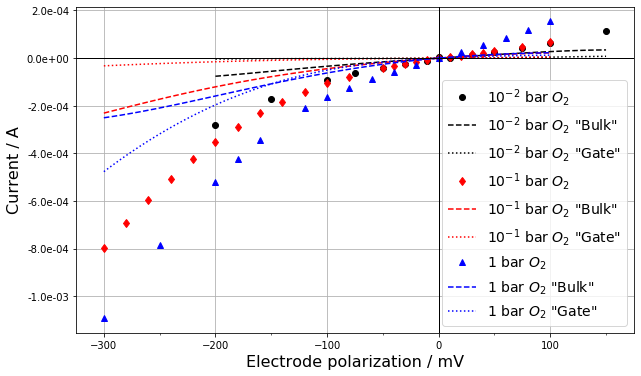

In [93]:
order = 5
_, ax = plt.subplots(figsize=(10,6))

v_max = np.max([np.max(v_1), np.max(v_10), np.max(v_100)]) *1000
v_min = np.min([np.min(v_1), np.min(v_10), np.min(v_100)]) *1000

v_1_pred = np.linspace(np.min(v_1), np.max(v_1))
v_10_pred = np.linspace(np.min(v_10), np.max(v_10))
v_100_pred = np.linspace(np.min(v_100), np.max(v_100))


ax.plot(v_1 * 1000, imeas_1, 'ko', label='$10^{-2}$ bar $O_2$') #' Data')
ax.plot(v_1_pred * 1000, predict_i(v_1_pred, coefs_1, order), 'k--', label='$10^{-2}$ bar $O_2$ \"Bulk\"')
ax.plot(v_1_pred * 1000, i_gate(ha, sa, aa, T, 0.01, L, tg_1, v_1_pred) * W * G, 'k:', label='$10^{-2}$ bar $O_2$ \"Gate\"')


ax.plot(v_10 * 1000, imeas_10, 'rd', label='$10^{-1}$ bar $O_2$') #' Data')
ax.plot(v_10_pred * 1000, predict_i(v_10_pred, coefs_10, order), 'r--', label='$10^{-1}$ bar $O_2$ \"Bulk\"')
ax.plot(v_10_pred * 1000, i_gate(ha, sa, aa, T, 0.1, L, tg_10, v_10_pred) * W * G, 'r:', label='$10^{-1}$ bar $O_2$ \"Gate\"')


ax.plot(v_100 * 1000, imeas_100, 'b^', label='1 bar $O_2$') #' Data')
ax.plot(v_100_pred * 1000, predict_i(v_100_pred, coefs_100, order), 'b--', label='1 bar $O_2$ \"Bulk\"')
ax.plot(v_100_pred * 1000, i_gate(ha, sa, aa, T, 1, L, tg_100, v_100_pred) * W * G, 'b:', label='1 bar $O_2$ \"Gate\"')

ax.legend(fontsize=14)


ylims = plt.ylim()

ax.plot((v_min-25, v_max+25), [0,0], 'k-', lw=1)
ax.plot([0,0], ylims, 'k-', lw=1)

ax.set_xlim((v_min-25, v_max+25))
ax.set_ylim(ylims)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))

ax.set_xlabel('Electrode polarization / mV', fontsize=16)
ax.set_ylabel('Current / A', fontsize=16)

ax.grid()
# plt.savefig('frXAS Paper Figures\Plots\Predicted_IV_separate.png', dpi=300, bbox_inches='tight')
plt.show()

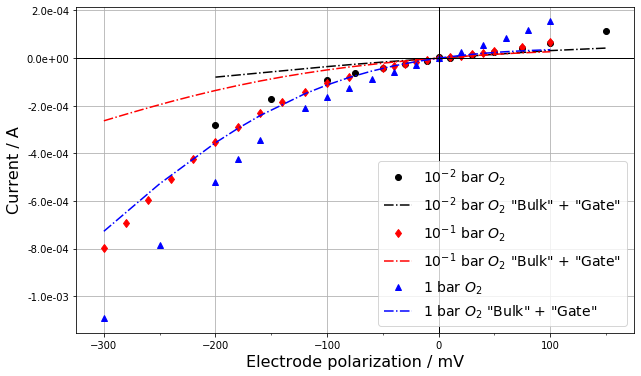

In [94]:
order = 5
_, ax = plt.subplots(figsize=(10,6))

v_max = np.max([np.max(v_1), np.max(v_10), np.max(v_100)]) *1000
v_min = np.min([np.min(v_1), np.min(v_10), np.min(v_100)]) *1000

ax.plot(v_1 * 1000, imeas_1, 'ko', label='$10^{-2}$ bar $O_2$') #' Data')
ax.plot(v_1 * 1000, predict_i(v_1, coefs_1, order) + i_gate(ha, sa, aa, T, 0.01, L, tg_1, v_1) * W * G,
        'k-.', label='$10^{-2}$ bar $O_2$ \"Bulk\" + \"Gate\"')


ax.plot(v_10 * 1000, imeas_10, 'rd', label='$10^{-1}$ bar $O_2$') #' Data')
ax.plot(v_10 * 1000, predict_i(v_10, coefs_10, order) + i_gate(ha, sa, aa, T, 0.1, L, tg_10, v_10) * W * G,
        'r-.', label='$10^{-1}$ bar $O_2$ \"Bulk\" + \"Gate\"')

ax.plot(v_100 * 1000, imeas_100, 'b^', label='1 bar $O_2$') #' Data')
ax.plot(v_100 * 1000, predict_i(v_100, coefs_100, order) + i_gate(ha, sa, aa, T, 1, L, tg_100, v_100) * W * G,
        'b-.', label='1 bar $O_2$ \"Bulk\" + \"Gate\"')

ax.legend(fontsize=14)


ylims = plt.ylim()

ax.plot((v_min-25, v_max+25), [0,0], 'k-', lw=1)
ax.plot([0,0], ylims, 'k-', lw=1)

ax.set_xlim((v_min-25, v_max+25))
ax.set_ylim(ylims)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))

ax.set_xlabel('Electrode polarization / mV', fontsize=16)
ax.set_ylabel('Current / A', fontsize=16)

ax.grid()
# plt.savefig('frXAS Paper Figures\Plots\Predicted_IV_summed.png', dpi=300, bbox_inches='tight')
plt.show()

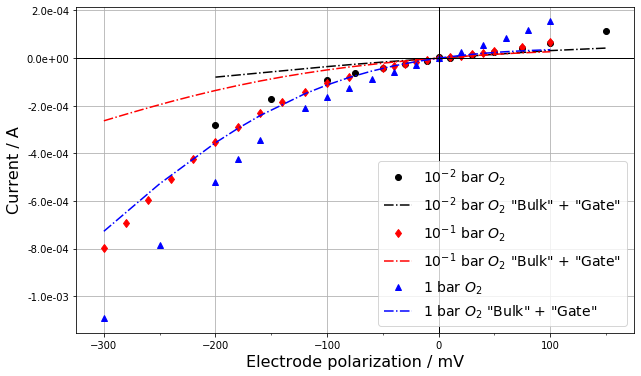

In [95]:
order = 5
_, ax = plt.subplots(figsize=(10,6))

v_max = np.max([np.max(v_1), np.max(v_10), np.max(v_100)]) *1000
v_min = np.min([np.min(v_1), np.min(v_10), np.min(v_100)]) *1000

ax.plot(v_1 * 1000, imeas_1, 'ko', label='$10^{-2}$ bar $O_2$') #' Data')
ax.plot(v_1 * 1000, predict_i(v_1, coefs_1, order) + i_gate(ha, sa, aa, T, 0.01, L, tg_1, v_1) * W * G,
        'k-.', label='$10^{-2}$ bar $O_2$ \"Bulk\" + \"Gate\"')


ax.plot(v_10 * 1000, imeas_10, 'rd', label='$10^{-1}$ bar $O_2$') #' Data')
ax.plot(v_10 * 1000, predict_i(v_10, coefs_10, order) + i_gate(ha, sa, aa, T, 0.1, L, tg_10, v_10) * W * G,
        'r-.', label='$10^{-1}$ bar $O_2$ \"Bulk\" + \"Gate\"')

ax.plot(v_100 * 1000, imeas_100, 'b^', label='1 bar $O_2$') #' Data')
ax.plot(v_100 * 1000, predict_i(v_100, coefs_100, order) + i_gate(ha, sa, aa, T, 1, L, tg_100, v_100) * W * G,
        'b-.', label='1 bar $O_2$ \"Bulk\" + \"Gate\"')

ax.legend(fontsize=14)


ylims = plt.ylim()

ax.plot((v_min-25, v_max+25), [0,0], 'k-', lw=1)
ax.plot([0,0], ylims, 'k-', lw=1)

ax.set_xlim((v_min-25, v_max+25))
ax.set_ylim(ylims)

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))

ax.set_xlabel('Electrode polarization / mV', fontsize=16)
ax.set_ylabel('Current / A', fontsize=16)

ax.grid()
# plt.savefig('frXAS Paper Figures\Plots\Predicted_IV_summed.png', dpi=300, bbox_inches='tight')
plt.show()

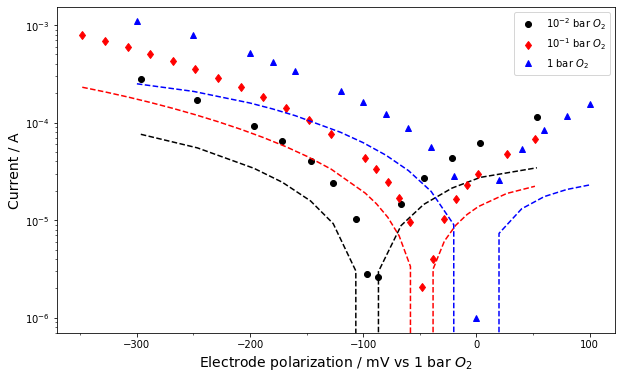

In [96]:
_, ax = plt.subplots(figsize=(10,6))

ax.semilogy((v_1-0.0965419) *1000, np.abs(imeas_1), 'ko', label='$10^{-2}$ bar $O_2$') #' Data')
ax.semilogy((v_1-0.0965419) *1000, np.abs(predict_i(v_1, coefs_1, order)), 'k--') #, label='$10^{-2}$ bar $O_2$ fr-XAS Predicted')

ax.semilogy((v_10-0.0482709) *1000, np.abs(imeas_10), 'rd', label='$10^{-1}$ bar $O_2$') #' Data')
ax.semilogy((v_10-0.0482709) *1000, np.abs(predict_i(v_10, coefs_10, order)), 'r--') #, label='$10^{-1}$ bar $O_2$ fr-XAS Predicted')

ax.semilogy(v_100 * 1000, np.abs(imeas_100), 'b^', label='1 bar $O_2$') #' Data')
ax.semilogy(v_100 * 1000, np.abs(predict_i(v_100, coefs_100, order)), 'b--') #, label='1 bar $O_2$ fr-XAS Predicted')

ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.set_xlabel('Electrode polarization / mV vs 1 bar $O_2$', fontsize=14)
ax.set_ylabel('Current / A', fontsize=14)
plt.show()

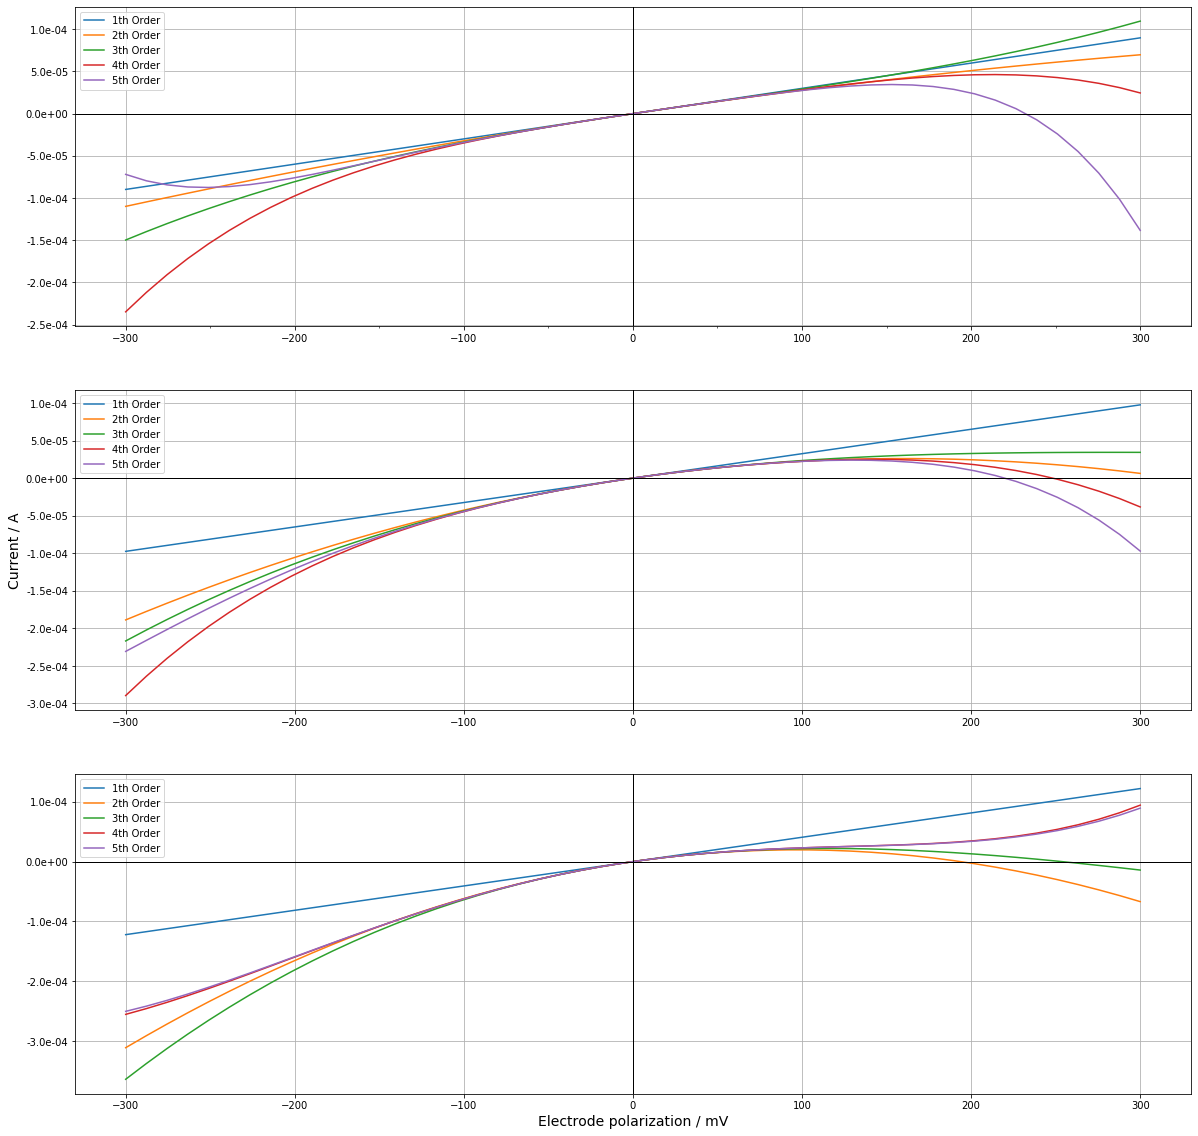

In [340]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20,20))
v_1_pred = np.linspace(-.3, 0.3)
v_10_pred = np.linspace(-.3, 0.3)
v_100_pred = np.linspace(-.3, 0.3)

# ax1.plot(v_1 * 1000, imeas_1, 'ko', label='$10^{-2}$ bar $O_2$') #' Data')
for i in range(1,6):
    ax1.plot(v_1_pred * 1000, predict_i(v_1_pred, coefs_1, i), label=f'{i}th Order')
ylims = ax1.get_ylim()
xlims = ax1.get_xlim()
ax1.legend()
ax1.plot(xlims,[0,0], 'k-', lw=1)
ax1.plot([0,0], ylims, 'k-', lw=1)
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)


# ax2.plot(v_10 * 1000, imeas_10, 'rd', label='$10^{-1}$ bar $O_2$') #' Data')
for i in range(1,6):
    ax2.plot(v_10_pred * 1000, predict_i(v_10_pred, coefs_10, i), label=f'{i}th Order') #, label='$10^{-1}$ bar $O_2$ fr-XAS Predicted')
ylims = ax2.get_ylim()
xlims = ax2.get_xlim()
ax2.legend()
ax2.plot(xlims,[0,0], 'k-', lw=1)
ax2.plot([0,0], ylims, 'k-', lw=1)
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)


# ax3.plot(v_100 * 1000, imeas_100, 'b^', label='1 bar $O_2$') #' Data')
for i in range(1,6):
    ax3.plot(v_100_pred * 1000, predict_i(v_100_pred, coefs_100, i), label=f'{i}th Order') #, label='1 bar $O_2$ fr-XAS Predicted')
ylims = ax3.get_ylim()
xlims = ax3.get_xlim()
ax3.legend()
ax3.plot(xlims,[0,0], 'k-', lw=1)
ax3.plot([0,0], ylims, 'k-', lw=1)
ax3.set_xlim(xlims)
ax3.set_ylim(ylims)


ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(50))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))

ax3.set_xlabel('Electrode polarization / mV', fontsize=14)
ax2.set_ylabel('Current / A', fontsize=14)

ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

In [81]:
v_1_ind = np.argwhere(v_1==-.1)[0,0]
v_10_ind = np.argwhere(v_10==-.1)[0,0]
v_100_ind = np.argwhere(v_100==-.1)[0,0]

A_ins = .35**2 - 3*.35*G
L_ins = 283e-7

i_bulk1 = predict_i(v_1[v_1_ind], coefs_1, 5)
i_bulk10 = predict_i(v_10[v_10_ind], coefs_10, 5) 
i_bulk100 = predict_i(v_100[v_100_ind], coefs_100, 5)

i_gate1 = i_gate(ha, sa, aa, T, 0.01, L, tg_1, v_1[v_1_ind]) * W * G
i_gate10 = i_gate(ha, sa, aa, T, 0.1, L, tg_10, v_10[v_10_ind]) * W * G
i_gate100 = i_gate(ha, sa, aa, T, 1, L, tg_100, v_100[v_100_ind]) * W * G

i_mask1 = imeas_1[v_1_ind] - i_bulk1 - i_gate1
i_mask10 = imeas_10[v_10_ind] - i_bulk10 - i_gate10
i_mask100= imeas_100[v_100_ind] - i_bulk100 - i_gate100

rho_1 = v_1[v_1_ind] / i_mask1 * A_ins/L_ins
rho_10 = v_10[v_10_ind] / i_mask10 * A_ins/L_ins
rho_100 = v_100[v_100_ind] / i_mask100 * A_ins/L_ins

In [82]:
print(f'Measured: 1% {imeas_1[v_1_ind]:.2e} 10% {imeas_10[v_10_ind]:.2e} 100% {imeas_100[v_100_ind]:.2e}')
print(f'Bulk: 1% {i_bulk1:.2e} 10% {i_bulk10:.2e} 100% {i_bulk100:.2e}')
print(f'Gate: 1% {i_gate1:.2e} 10% {i_gate10:.2e} 100% {i_gate100:.2e}')
print(f'mask: 1% {i_mask1:.2e} 10% {i_mask10:.2e} 100% {i_mask100:.2e}')
print(f'rho 1%: {rho_1:.2e} 10%: {rho_10:.2e} 100%: {rho_100:.2e}')


Measured: 1% -9.32e-05 10% -1.06e-04 100% -1.64e-04
Bulk: 1% -3.40e-05 10% -4.43e-05 100% -6.23e-05
Gate: 1% -1.51e-06 10% -5.09e-06 100% -4.56e-05
mask: 1% -5.76e-05 10% -5.63e-05 100% -5.62e-05
rho 1%: 7.48e+06 10%: 7.66e+06 100%: 7.68e+06


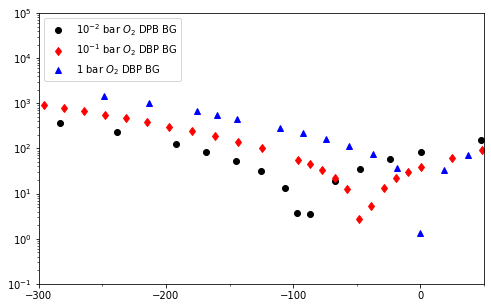

In [101]:
A_gate = 1.04345*4.478e-4
L_patt = 600e-7
L_Keita = 370e-7
R_ohm = 47.2
eta_1 = v_1 - imeas_1 * R_ohm
eta_10 = v_10 - imeas_10 * R_ohm
eta_100 = v_100 - imeas_100 * R_ohm

geom_coef = L_Keita / (L_patt * A_gate)

_, ax = plt.subplots(figsize=(7.98,4.98))

ax.semilogy((eta_1-0.0965419) *1000, np.abs(imeas_1)* geom_coef *1000, 'ko', label='$10^{-2}$ bar $O_2$ DPB BG') #' Data')

ax.semilogy((eta_10-0.0482709) *1000, np.abs(imeas_10)*geom_coef*1000, 'rd', label='$10^{-1}$ bar $O_2$ DBP BG') #' Data')

ax.semilogy(eta_100 * 1000, np.abs(imeas_100)*geom_coef*1000, 'b^', label='1 bar $O_2$ DBP BG') #' Data')


ax.legend(loc='upper left')

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(50))

# ax.set_xlabel('Electrode polarization / mV vs 1 bar $O_2$', fontsize=14)
# ax.set_ylabel('Current density |i| / mA $cm^{-2}$', fontsize=14)
# ax.set_yticklabels([])
# ax.set_xticklabels([])
ax.set_ylim(1e-1, 1e5)
ax.set_xlim(-300, 50)
# plt.savefig('Plots\July18_Measured_Current_Density_V_UniAppE.svg', bbox_inches='tight', dpi=300, transparent=True)
plt.show()